# Covid Time-Series Data Project

The dataset is a time-series data set of COVID-19 cases in America created by the Johns Hopkins University CSSE Team (https://github.com/CSSEGISandData/COVID-19). This project will be a general exploration of COVID-19 cases throughout 2020 and mainly look to visualize the case numbers and find any patterns. We will be working with a subset containing the data up to Dec 31, 2020.

In [2]:
import pandas as pd

covid = pd.read_csv('covid_data.csv')
covid.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,4313,4367,4405,4441,4446,4465,4483,4535,4584,4641
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,760,765,770,777,825,827,830,834,846,859
6,84001013,US,USA,840,1013.0,Butler,Alabama,US,31.753001,-86.680575,...,1412,1423,1434,1448,1446,1452,1457,1482,1493,1508
7,84001015,US,USA,840,1015.0,Calhoun,Alabama,US,33.774837,-85.826304,...,8856,8968,9071,9167,9198,9232,9286,9345,9428,9494
8,84001017,US,USA,840,1017.0,Chambers,Alabama,US,32.913601,-85.390727,...,2161,2176,2191,2200,2203,2214,2229,2275,2310,2341
9,84001019,US,USA,840,1019.0,Cherokee,Alabama,US,34.178060,-85.606390,...,1314,1329,1343,1368,1368,1369,1372,1393,1403,1414


## Cleaning the data

Looking through the first few rows, we can see that the number of cases is provided by county in each state. Most of the columns do not give us information we can use, so we will drop them to organize the dataframe. After that, we will group the dataset by 'Province_State' and aggregate the sum for case numbers of each day. 

In [3]:
import numpy as np

dropped_columns = ['Admin2','UID', 'iso2', 'iso3', 'code3', 'FIPS','Country_Region', 'Lat', 'Long_', 'Combined_Key']
covid = covid.drop(dropped_columns, axis = 1)

covid_states = covid.groupby('Province_State').agg(np.sum)
covid_states.reset_index(inplace = True)
covid_states.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,329811,334569,338801,342426,343458,345628,347897,351804,356820,361226
1,Alaska,0,0,0,0,0,0,0,0,0,...,44463,44828,45104,45104,45479,45781,45909,46092,46483,46986
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,467215,473273,480319,486935,493041,494337,504423,507222,512489,520207
4,Arkansas,0,0,0,0,0,0,0,0,0,...,205048,207941,211145,213267,213969,214877,216528,219246,222430,225138


We will add in each state's population and the region it is in to have a better understanding of the numbers. We will read in a csv file that has each state's population taken from the 2019 US Census Data, and assign a region to each state. The US Census Bureau divides the US into four regions: Northeast, Midwest, South, and West. 

We can also see that American territories/regions are in the list, so we will remove those as we are focusing on the 50 states and D.C. 

In [4]:
covid_states = covid_states.drop([2,9,13,14,39,44,52])
covid_states = covid_states.reset_index()
covid_states = covid_states.drop(columns='index')
covid_states.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,329811,334569,338801,342426,343458,345628,347897,351804,356820,361226
1,Alaska,0,0,0,0,0,0,0,0,0,...,44463,44828,45104,45104,45479,45781,45909,46092,46483,46986
2,Arizona,0,0,0,0,1,1,1,1,1,...,467215,473273,480319,486935,493041,494337,504423,507222,512489,520207
3,Arkansas,0,0,0,0,0,0,0,0,0,...,205048,207941,211145,213267,213969,214877,216528,219246,222430,225138
4,California,0,0,0,0,2,2,2,2,2,...,1958508,2002494,2040188,2060797,2120610,2156389,2192684,2228332,2261035,2291007


In [5]:
population = pd.read_csv('uspopulation.csv')
population.head()

,Province_State,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [6]:
state_populations = population['Population']
covid_states.insert(loc=1, column='Population', value=state_populations)
covid_states.head()

,Province_State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20
0,Alabama,4903185,0,0,0,0,0,0,0,0,...,329811,334569,338801,342426,343458,345628,347897,351804,356820,361226
1,Alaska,731545,0,0,0,0,0,0,0,0,...,44463,44828,45104,45104,45479,45781,45909,46092,46483,46986
2,Arizona,7278717,0,0,0,0,1,1,1,1,...,467215,473273,480319,486935,493041,494337,504423,507222,512489,520207
3,Arkansas,3017804,0,0,0,0,0,0,0,0,...,205048,207941,211145,213267,213969,214877,216528,219246,222430,225138
4,California,39512223,0,0,0,0,2,2,2,2,...,1958508,2002494,2040188,2060797,2120610,2156389,2192684,2228332,2261035,2291007


In [7]:
#assign a region to each state
def get_region(state):
    northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts',
                 'Rhode Island', 'Connecticut', 'New York','New Jersey', 'Pennsylvania', 'District of Columbia']
    midwest = ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota',
               'Iowa', 'Missouri' ,'North Dakota', 'South Dakota', 'Nebraska', 'Kansas']
    south = ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky' ,'North Carolina', 'South Carolina',
             'Tennessee' ,'Georgia', 'Florida', 'Alabama' ,'Mississippi' ,'Arkansas', 'Louisiana' ,'Texas', 'Oklahoma']
    west = ['Montana', 'Idaho', 'Wyoming' ,'Colorado' ,'New Mexico', 'Arizona' ,
            'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']
    region = ''
    
    if state in northeast:
        region = 'Northeast'
    elif state in midwest:
        region = 'Midwest'
    elif state in south:
        region = 'South'
    elif state in west:
        region = 'West'
    return region 

regions = covid_states['Province_State'].apply(get_region)
covid_states.insert(loc= 1, column='Region', value = regions)
covid_states.head()

,Province_State,Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20
0,Alabama,South,4903185,0,0,0,0,0,0,0,...,329811,334569,338801,342426,343458,345628,347897,351804,356820,361226
1,Alaska,West,731545,0,0,0,0,0,0,0,...,44463,44828,45104,45104,45479,45781,45909,46092,46483,46986
2,Arizona,West,7278717,0,0,0,0,1,1,1,...,467215,473273,480319,486935,493041,494337,504423,507222,512489,520207
3,Arkansas,South,3017804,0,0,0,0,0,0,0,...,205048,207941,211145,213267,213969,214877,216528,219246,222430,225138
4,California,West,39512223,0,0,0,0,2,2,2,...,1958508,2002494,2040188,2060797,2120610,2156389,2192684,2228332,2261035,2291007


## Visualizing the Numbers

In order to look at the general trend of COVID-19 in the US, we will look at numbers by state and also summarize the numbers by region. 

Text(0.5, 1.0, 'COVID-19 Cases by State in 2020')

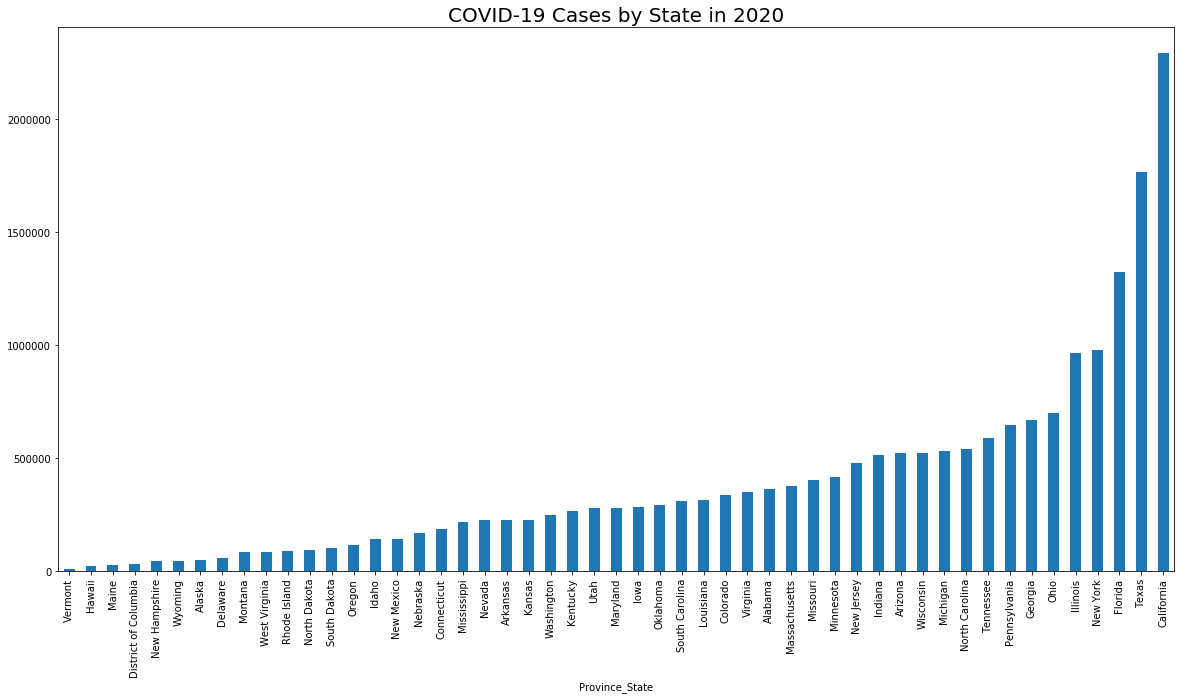

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
cases_2020 = covid_states.sort_values(by=['12/31/20'])[['Province_State','12/31/20']]
chart = cases_2020.plot(kind = 'bar', x='Province_State', y='12/31/20' ,figsize=(20,10), legend = False)
plt.title('COVID-19 Cases by State in 2020', fontsize = 20)

,12/31/20
Region,
Midwest,4908629
Northeast,2854992
South,7632611
West,4485951


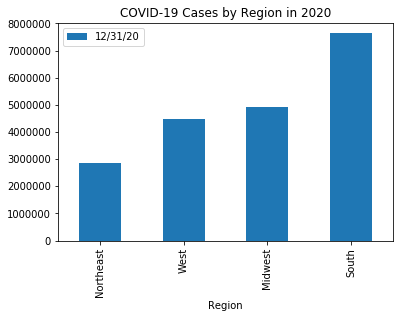

In [9]:
#make pivot table by region
import numpy as np
pv_covid_states = covid_states.pivot_table(values='12/31/20', index = 'Region', aggfunc = np.sum)
pv_covid_states.sort_values(by=['12/31/20']).plot(kind='bar', title='COVID-19 Cases by Region in 2020', legend = False)
pv_covid_states

One thing we can immediately see is that the cases' distribution is very similar to the distribution for the population of the regions.

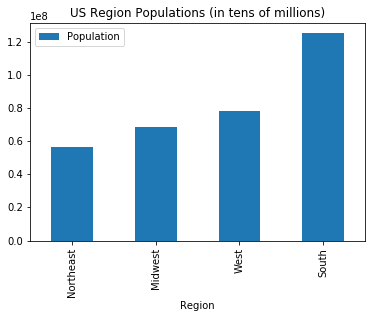

In [10]:
pv_pop = covid_states.pivot_table(values='Population', index='Region', aggfunc = np.sum)
pv_pop.sort_values(by=['Population']).plot(kind='bar', title='US Region Populations (in tens of millions)', legend = False)

## Looking at Cases Relative to Population

While we can look at the case numbers for each state, one important aspect to consider is the case numbers relative to the population of each state. This will help us have a better understanding of the impact COVID-19 is having on a state level rather than in comparison to the other states. The CDC has a dataset that keeps scaled statistics such as "Case Rate Per 100000". We will read in the file and clean it. 

In [11]:
cases_scaled = pd.read_csv('cdc_file.csv')
pd.options.display.max_rows = None
cases_scaled.head()

,State/Territory,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,Alaska,46262,NaN,NaN,2272,6324,214,NaN,NaN,15,29,44.4,0.3
1,Alabama,369458,297753.0,71705.0,26000,7535,4872,4254.0,618.0,187,99,75.8,0.5
2,Arkansas,231442,NaN,NaN,17473,7669,3729,NaN,NaN,288,123,82.7,1.4
3,American Samoa,3,NaN,NaN,0,5,0,NaN,NaN,0,0,0.0,0.0
4,Arizona,539150,512047.0,27103.0,46109,7407,9061,8166.0,895.0,637,124,90.5,1.3
5,California,2345909,NaN,NaN,273244,5937,26357,NaN,NaN,2374,66,98.8,0.9
6,Colorado,339172,324946.0,14226.0,15553,5890,4912,4259.0,653.0,320,85,38.6,0.8
7,Connecticut,190120,178949.0,11171.0,17377,5332,6099,4937.0,1162.0,308,171,69.6,1.2
8,District of Columbia,29509,NaN,NaN,1799,4181,792,NaN,NaN,30,112,36.4,0.6
9,Delaware,58873,56455.0,2418.0,4400,6046,930,828.0,102.0,35,95,64.6,0.5


We can see that there are a number of columns that we either already have or are not useful to us, so we will drop those columns. The set also includes American territories so we will drop those as well.

In [12]:
cs_dropped_columns = ['Total Cases', 'Confirmed Cases', 'Probable Cases', 'Confirmed Deaths', 'Probable Deaths', 'Deaths in Last 7 Days', 'Death Rate per 100000', 'Death Rate per 100K in Last 7 Days', 'Case Rate per 100000 in Last 7 Days']
cases_scaled = cases_scaled.drop(columns=cs_dropped_columns)
cases_scaled = cases_scaled.drop([3, 11, 13, 28, 35, 44, 45, 47, 54, 60])
cases_scaled.reset_index(inplace=True)
cases_scaled = cases_scaled.drop(columns='index')
cases_scaled.head()

,State/Territory,Cases in Last 7 Days,Case Rate per 100000,Total Deaths
0,Alaska,2272,6324,214
1,Alabama,26000,7535,4872
2,Arkansas,17473,7669,3729
3,Arizona,46109,7407,9061
4,California,273244,5937,26357


## Creating a Summary Table

Now that we have all this information, we can combine the table with some of the information from the table that we already have to create a summary table. 

In [13]:
s_columns = ['Province_State', 'Region', 'Population' ,'12/31/20']
covid_slice = covid_states[s_columns]
covid_slice = covid_slice.rename(columns={'12/31/20':'Total Cases 2020', 'Province_State': 'State/Territory'})
covid_slice.head()

,State/Territory,Region,Population,Total Cases 2020
0,Alabama,South,4903185,361226
1,Alaska,West,731545,46986
2,Arizona,West,7278717,520207
3,Arkansas,South,3017804,225138
4,California,West,39512223,2291007


In [14]:
covid_summary = covid_slice.merge(cases_scaled, how='left', on='State/Territory')
covid_summary.head()

,State/Territory,Region,Population,Total Cases 2020,Cases in Last 7 Days,Case Rate per 100000,Total Deaths
0,Alabama,South,4903185,361226,26000.0,7535.0,4872.0
1,Alaska,West,731545,46986,2272.0,6324.0,214.0
2,Arizona,West,7278717,520207,46109.0,7407.0,9061.0
3,Arkansas,South,3017804,225138,17473.0,7669.0,3729.0
4,California,West,39512223,2291007,273244.0,5937.0,26357.0


## Case Rate per 100000

Case Rate per 100000 is the state's number of cases per 100,000 people. It gives a better indication of the proportion of people in the state that have COVID-19 as comparing case numbers is heavily skewed by the population differences of each state. 

New Jersey does not have any data for the CDC dataset numbers, so we will omit it for this section. 

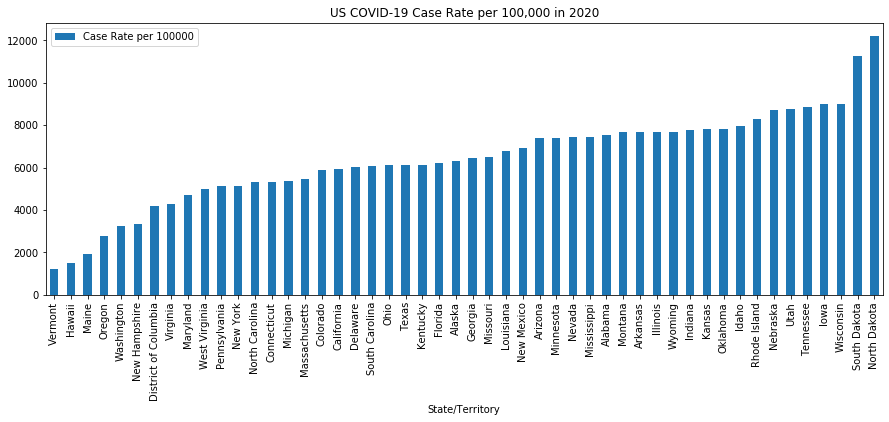

In [15]:
cases_100 = covid_summary.sort_values(by=['Case Rate per 100000'])[['State/Territory','Case Rate per 100000']]
cases_100 = cases_100.drop(30)
cases_100.plot(kind='bar', x='State/Territory', y='Case Rate per 100000', figsize=(15,5), title = 'US COVID-19 Case Rate per 100,000 in 2020')

Looking at the chart, we can see that the list of states that have the highest case rate per 100,000 is quite different from the states with the most overall cases. 

5 States with Most Cases:                                        
    - California
    - Texas
    - Florida
    - New York
    - Illinois
    
5 States with Highest Case Rate per 100,000:
    - North Dakota
    - South Dakota
    - Florida
    - Iowa
    - Tennessee
    
The US has commonly looked at the states with the most cases as the biggest points of focus. However, looking at these numbers we can see that there are many states whose numbers are more alarming relative to the population of the state. Looking at California, we can see that while it has the most COVID-19 cases, it is not even in the top 50% for case rate per 100,000. It will be important to determine why these states have been impacted so much.  

## Visualizing Case Numbers with Bar_Chart_Race

In order to better visualize the case numbers over the past year, we will be using bar_chart_race, a visualization tool created by tdpetrou (https://github.com/dexplo/bar_chart_race). It requires data to be in a wide format, so we will change the data to be in the correct form. First, we will transpose the dataset so that the the dates are the column titles and replace the 0 values with np.nan values.

In [16]:
covid_states_transposed = covid_states.transpose()
covid_states_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Region,South,West,West,South,West,West,Northeast,South,Northeast,South,...,Midwest,South,South,West,Northeast,South,West,South,Midwest,West
Population,4903185,731545,7278717,3017804,39512223,5758736,3565287,973764,705749,21477737,...,884659,6829174,28995881,3205958,623989,8535519,7614893,1792147,5822434,578759
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
#set column names to states
covid_states_transposed.columns = covid_states_transposed.iloc[0]
covid_states_transposed.columns.name = None

#drop first 3 rows
covid_states_transposed = covid_states_transposed.drop(['Province_State','Region','Population'])

#replace 0 with np.nan
covid_states_transposed = covid_states_transposed.replace(0, np.nan)

covid_states_transposed.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1/26/20,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [18]:
# import bar_chart_race as bcr
# bcr_test = covid_states_transposed.iloc[53:345]
# bcr.bar_chart_race(bcr_test, title='Covid', n_bars = 25)

This chart is useful in understanding how Covid cases in each state developed throughout 2020. It is interesting to look at when the biggest jumps occured, with many coinciding shortly after major holidays. 

## Review and Further Analysis

In review, we looked through the dataset and looked at different statistics to give us a better understanding of how COVID-19 impacted the US in 2020. In the next part, we will look through the numbers and see what insights we can find.